In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hashcode11/demand.csv')
df.head()


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
df.shape


(1048575, 5)

In [ ]:
df.columns


Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [ ]:
#pick different buisness units
df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

In [ ]:
df.Product_Category.nunique()

33

In [ ]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [ ]:
def check_order_demand(x):
    try:
        int(x)
    except:
        return False
    return True
#Check where Order_demand is not an integer
df[~df.Order_Demand.apply(lambda x: check_order_demand(x))].head(6)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112290,Product_2169,Whse_A,Category_024,2012/8/9,(1)
112307,Product_2132,Whse_A,Category_009,2012/11/1,(24)
112308,Product_2144,Whse_A,Category_009,2012/11/1,(24)
112356,Product_2118,Whse_A,Category_009,2012/3/7,(50)
112357,Product_2120,Whse_A,Category_009,2012/3/7,(100)
112360,Product_1794,Whse_A,Category_024,2012/6/28,(1)


In [ ]:
# Convert the Order_demand to an Integer
def change_to_int(x):
    try:
        return int(x)
    except:
        return int(x[1:-1])

df.Order_Demand = df.Order_Demand.apply(lambda x: change_to_int(x) )

In [ ]:
df.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [ ]:
# Rename the columns
df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
# Check for missing data
df.isna().sum()

Code             0
Warehouse        0
Category         0
Date         11239
Demand           0
dtype: int64

In [ ]:
100 * df.isna().sum()[3]/ df.shape[0]

1.0718355863910545

In [ ]:
df = df.dropna()
df.isna().sum()

Code         0
Warehouse    0
Category     0
Date         0
Demand       0
dtype: int64

In [ ]:
df.Date.min(), df.Date.max()

('2011/1/8', '2017/1/9')

In [ ]:
df.Date.sort_values().unique()[:10]

array(['2011/1/8', '2011/10/20', '2011/10/31', '2011/11/18', '2011/11/21',
       '2011/11/22', '2011/11/23', '2011/11/24', '2011/11/25',
       '2011/11/28'], dtype=object)

In [ ]:
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
df.dtypes


Code         object
Warehouse    object
Category     object
Date         object
Demand        int64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Code                 object
Warehouse            object
Category             object
Date         datetime64[ns]
Demand                int64
dtype: object

In [ ]:
df

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [ ]:
df.sort_values(by='Date', inplace = True)

In [ ]:
df


,Code,Warehouse,Category,Date,Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
...,...,...,...,...,...
1009604,Product_1710,Whse_J,Category_026,2017-01-06,15
921328,Product_1359,Whse_J,Category_019,2017-01-06,100000
908447,Product_0250,Whse_C,Category_007,2017-01-09,148
863020,Product_1904,Whse_C,Category_019,2017-01-09,4000


In [ ]:
df.dtypes

Code                 object
Warehouse            object
Category             object
Date         datetime64[ns]
Demand                int64
dtype: object

In [ ]:
df = df.set_index('Date')
df

,Code,Warehouse,Category,Demand
Date,,,,
2011-01-08,Product_0965,Whse_A,Category_006,2
2011-05-31,Product_1724,Whse_A,Category_003,108
2011-06-24,Product_1521,Whse_S,Category_019,85000
2011-06-24,Product_1521,Whse_S,Category_019,7000
2011-09-02,Product_1507,Whse_C,Category_019,1250
...,...,...,...,...
2017-01-06,Product_1710,Whse_J,Category_026,15
2017-01-06,Product_1359,Whse_J,Category_019,100000
2017-01-09,Product_0250,Whse_C,Category_007,148


<Axes: xlabel='Warehouse', ylabel='count'>

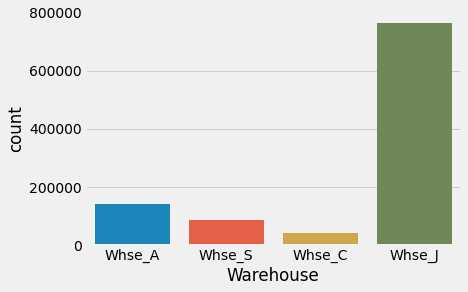

In [ ]:
# Find the aggregate demand among the warehouses
sns.countplot(x = 'Warehouse', data = df)

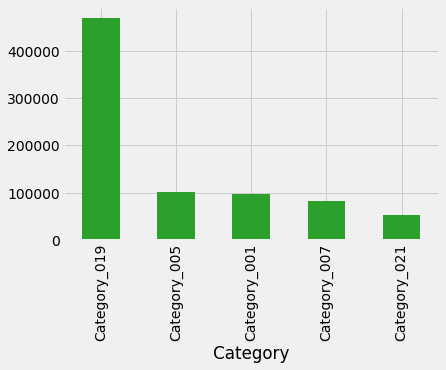

In [ ]:
# Plot the 5 most popular category
df.Category.value_counts().head(5).plot(kind = 'bar', color = color_pal[2])
plt.xlabel('Category')
plt.show()

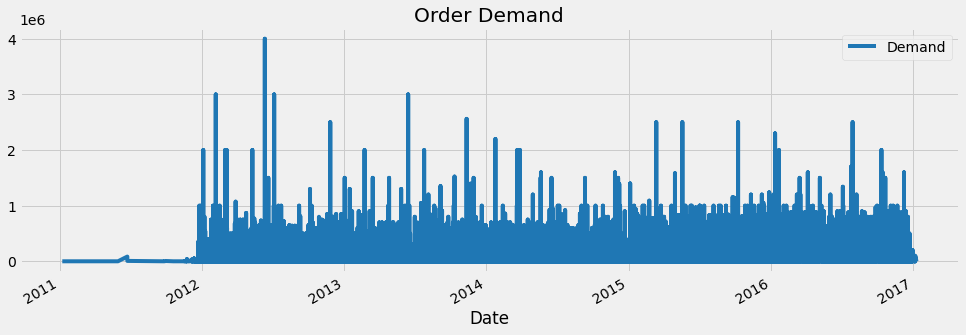

In [ ]:
# Find the distribution of the demand
df.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

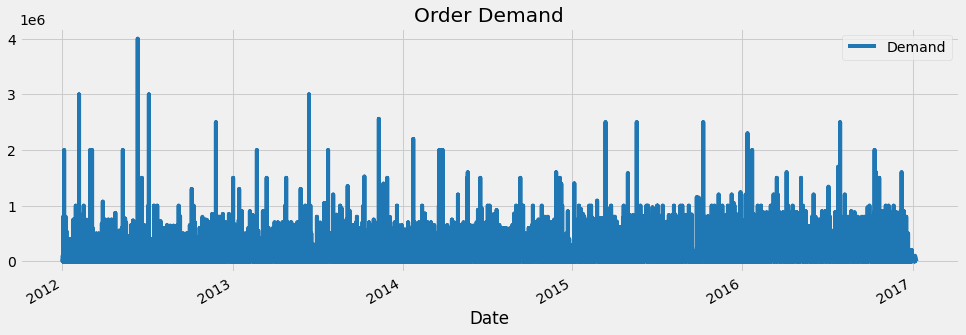

In [ ]:
#This data have a lot of missing data before January 1st, 2012 
df = df.loc[df.index >= '01-01-2012']
df.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

In [ ]:
# Total Demand by Warehouse
warehouse_Demand = df.groupby('Warehouse')['Demand'].sum()
warehouse_Demand

Warehouse
Whse_A     147646550
Whse_C     582039557
Whse_J    3363001849
Whse_S    1033122081
Name: Demand, dtype: int64

<Axes: ylabel='Warehouse'>

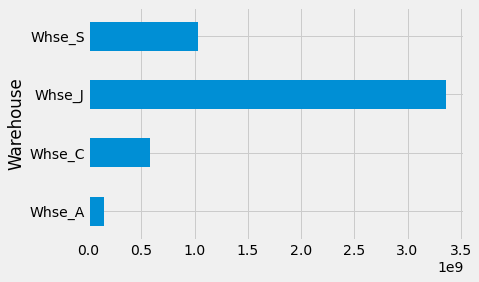

In [ ]:
warehouse_Demand.plot(kind = 'barh', ylabel = 'Sum of the demand' )

In [ ]:
df.head()

,Code,Warehouse,Category,Demand
Date,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2
2012-01-02,Product_0288,Whse_S,Category_021,100
2012-01-02,Product_0595,Whse_S,Category_032,42
2012-01-02,Product_1195,Whse_S,Category_019,5000
2012-01-02,Product_1817,Whse_S,Category_006,2500


In [ ]:
#choosing warehouse J
df = df[df['Warehouse'] == 'Whse_J']
df

,Code,Warehouse,Category,Demand
Date,,,,
2012-01-04,Product_1056,Whse_J,Category_032,120
2012-01-05,Product_0720,Whse_J,Category_001,5
2012-01-05,Product_0760,Whse_J,Category_001,25
2012-01-05,Product_0620,Whse_J,Category_001,2
2012-01-05,Product_0033,Whse_J,Category_005,500
...,...,...,...,...
2017-01-06,Product_0025,Whse_J,Category_005,500
2017-01-06,Product_0025,Whse_J,Category_005,700
2017-01-06,Product_1970,Whse_J,Category_005,2000


In [ ]:
df.Category.unique()

array(['Category_032', 'Category_001', 'Category_005', 'Category_015',
       'Category_021', 'Category_019', 'Category_007', 'Category_006',
       'Category_024', 'Category_008', 'Category_011', 'Category_023',
       'Category_030', 'Category_033', 'Category_028', 'Category_017',
       'Category_013', 'Category_026', 'Category_018', 'Category_022',
       'Category_009', 'Category_031', 'Category_003', 'Category_010',
       'Category_012'], dtype=object)

<Axes: ylabel='Category'>

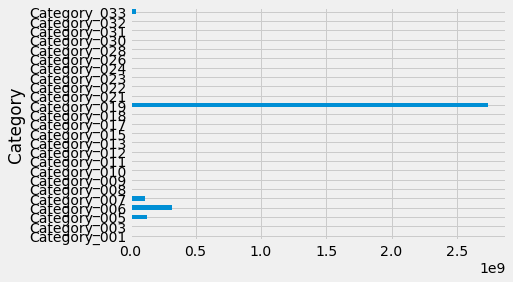

In [ ]:
category_Demand = df.groupby('Category')['Demand'].sum()
category_Demand.plot(kind = 'barh', ylabel = 'Categorywise demand' )

<Axes: ylabel='Category'>

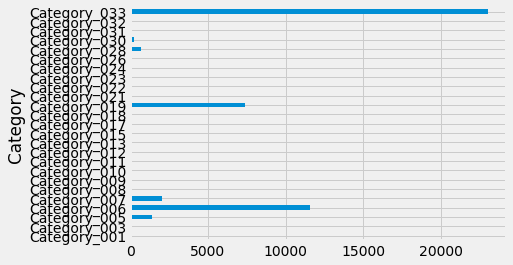

In [ ]:
category_Demand = df.groupby('Category')['Demand'].mean()
category_Demand.plot(kind = 'barh', ylabel = 'Categorywise demand' )

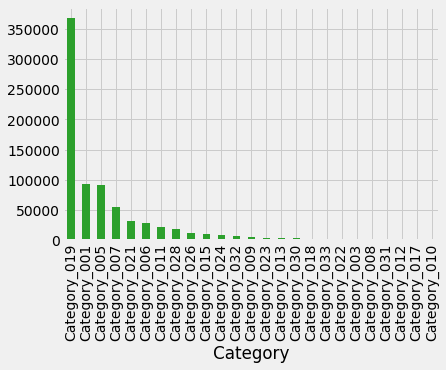

In [ ]:
# Plot the 5 most popular category
df.Category.value_counts().head(1000).plot(kind = 'bar', color = color_pal[2])
plt.xlabel('Category')
plt.show()

In [ ]:
df.Warehouse.unique()

array(['Whse_J'], dtype=object)

In [ ]:
df = df[df['Category'] == 'Category_019']
df


,Code,Warehouse,Category,Demand
Date,,,,
2012-01-05,Product_1283,Whse_J,Category_019,600
2012-01-05,Product_1346,Whse_J,Category_019,1000
2012-01-05,Product_1359,Whse_J,Category_019,25000
2012-01-05,Product_1316,Whse_J,Category_019,200
2012-01-05,Product_1381,Whse_J,Category_019,5000
...,...,...,...,...
2017-01-06,Product_1453,Whse_J,Category_019,8000
2017-01-06,Product_1408,Whse_J,Category_019,1000
2017-01-06,Product_1316,Whse_J,Category_019,10000


In [ ]:
df.drop(['Warehouse'], axis=1, inplace=True)
df

<ipython-input-41-ffa0fcc2d932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Warehouse'], axis=1, inplace=True)


,Code,Category,Demand
Date,,,
2012-01-05,Product_1283,Category_019,600
2012-01-05,Product_1346,Category_019,1000
2012-01-05,Product_1359,Category_019,25000
2012-01-05,Product_1316,Category_019,200
2012-01-05,Product_1381,Category_019,5000
...,...,...,...
2017-01-06,Product_1453,Category_019,8000
2017-01-06,Product_1408,Category_019,1000
2017-01-06,Product_1316,Category_019,10000


In [ ]:
df.Code.unique()

array(['Product_1283', 'Product_1346', 'Product_1359', 'Product_1316',
       'Product_1381', 'Product_1564', 'Product_1360', 'Product_1264',
       'Product_1222', 'Product_1241', 'Product_1463', 'Product_1349',
       'Product_1555', 'Product_1294', 'Product_1378', 'Product_1382',
       'Product_1248', 'Product_1451', 'Product_0408', 'Product_1314',
       'Product_1276', 'Product_0410', 'Product_0861', 'Product_1356',
       'Product_1478', 'Product_1312', 'Product_0409', 'Product_0407',
       'Product_2014', 'Product_1401', 'Product_1458', 'Product_1392',
       'Product_1554', 'Product_1229', 'Product_1355', 'Product_1274',
       'Product_1623', 'Product_1286', 'Product_1648', 'Product_1275',
       'Product_1279', 'Product_1187', 'Product_1550', 'Product_1278',
       'Product_0074', 'Product_1521', 'Product_1562', 'Product_1374',
       'Product_1500', 'Product_1480', 'Product_1387', 'Product_1216',
       'Product_1512', 'Product_1518', 'Product_1295', 'Product_1315',
      

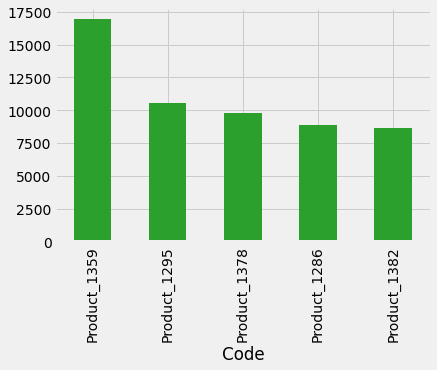

In [ ]:
# Plot the 5 most popular category
df.Code.value_counts().head(5).plot(kind = 'bar', color = color_pal[2])
plt.xlabel('Code')
plt.show()

In [ ]:
df = df[df['Code'] == 'Product_1359']
df

,Code,Category,Demand
Date,,,
2012-01-05,Product_1359,Category_019,25000
2012-01-05,Product_1359,Category_019,1000
2012-01-05,Product_1359,Category_019,10000
2012-01-05,Product_1359,Category_019,5000
2012-01-05,Product_1359,Category_019,150000
...,...,...,...
2016-12-28,Product_1359,Category_019,11000
2016-12-28,Product_1359,Category_019,50000
2016-12-28,Product_1359,Category_019,50000


In [ ]:
df.isna().sum()

Code        0
Category    0
Demand      0
dtype: int64

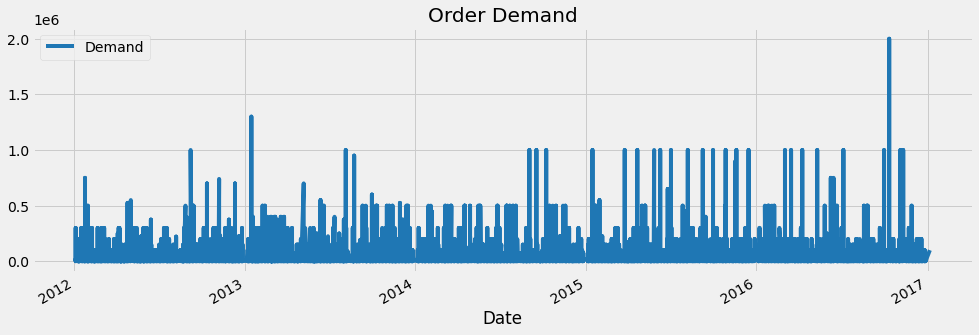

In [ ]:
# Find the distribution of the demand
df.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

In [ ]:
" Function that create time series features using the index columns"
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df)
df

,Code,Category,Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,,,
2012-01-05,Product_1359,Category_019,25000,3,1,1,2012,1
2012-01-05,Product_1359,Category_019,1000,3,1,1,2012,1
2012-01-05,Product_1359,Category_019,10000,3,1,1,2012,1
2012-01-05,Product_1359,Category_019,5000,3,1,1,2012,1
2012-01-05,Product_1359,Category_019,150000,3,1,1,2012,1
...,...,...,...,...,...,...,...,...
2016-12-28,Product_1359,Category_019,11000,2,4,12,2016,52
2016-12-28,Product_1359,Category_019,50000,2,4,12,2016,52
2016-12-28,Product_1359,Category_019,50000,2,4,12,2016,52


In [ ]:
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']

#Visualise Features/ Target Relationship

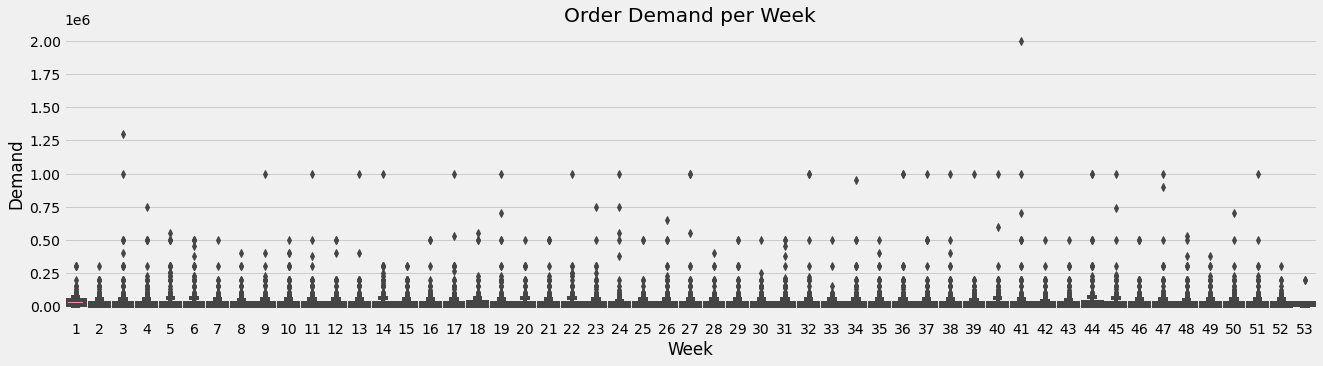

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Week', y='Demand')
ax.set_title('Order Demand per Week')
plt.show()

In [ ]:
# Resample data as Weekly 
df_week = df.resample('W').mean()

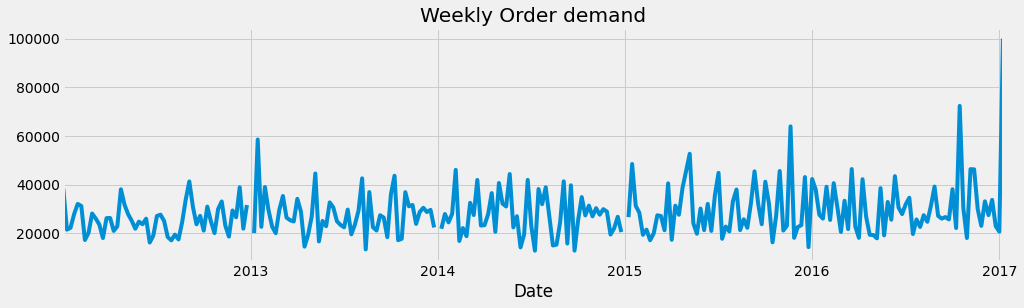

In [ ]:
df_week['Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
plt.show()

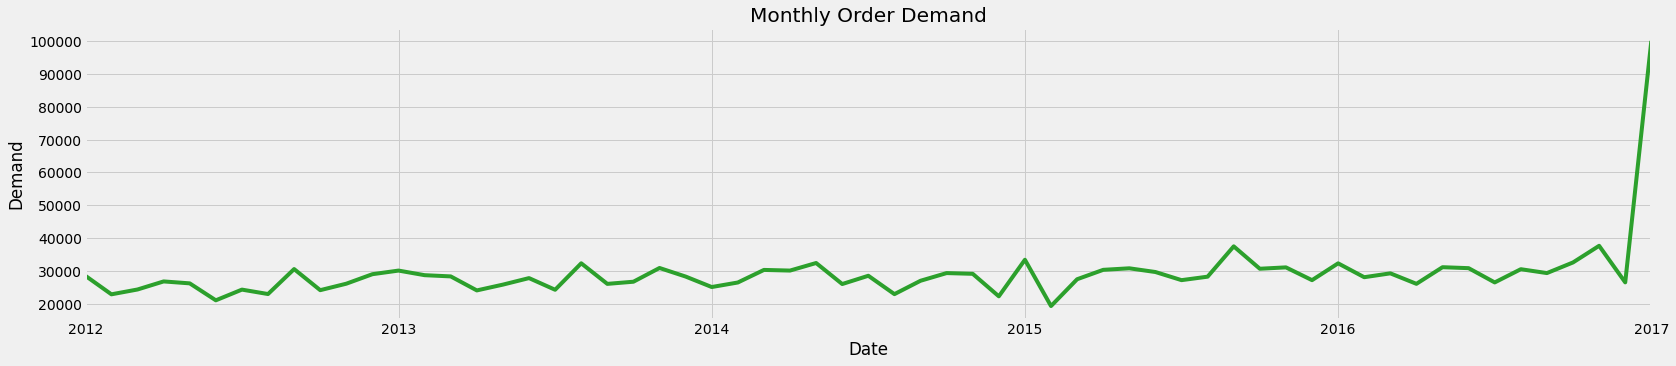

In [ ]:
 df_month = df.resample('MS').mean()
df_month.Demand.plot(figsize = (25,5), title = 'Monthly Order Demand', color = color_pal[2])
plt.ylabel('Demand')
plt.show()

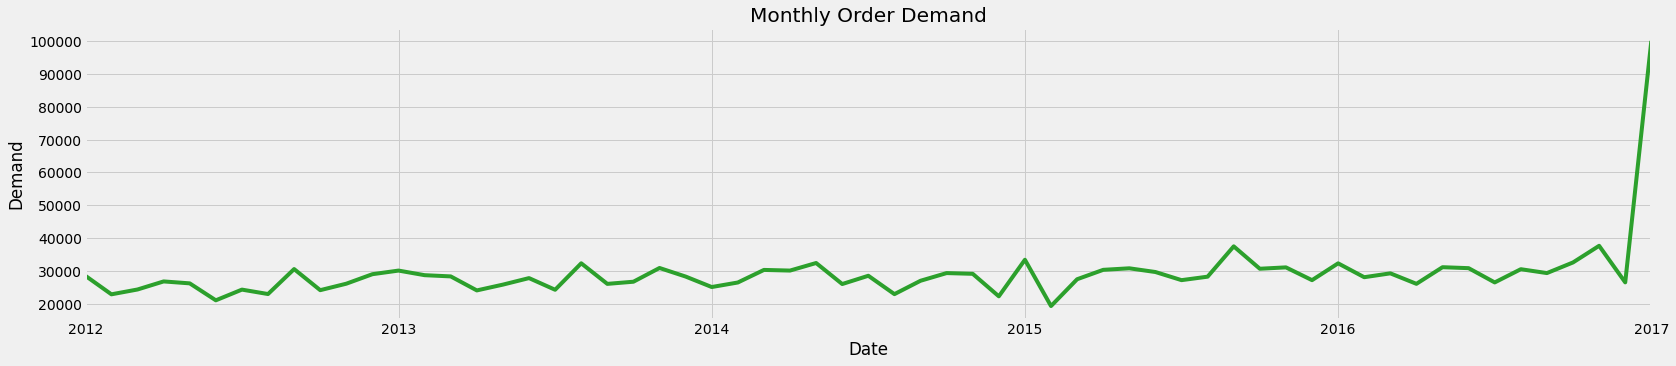

In [ ]:
df_month = df.resample('MS').mean()
df_month.Demand.plot(figsize = (25,5), title = 'Monthly Order Demand', color = color_pal[2])
plt.ylabel('Demand')
plt.show()

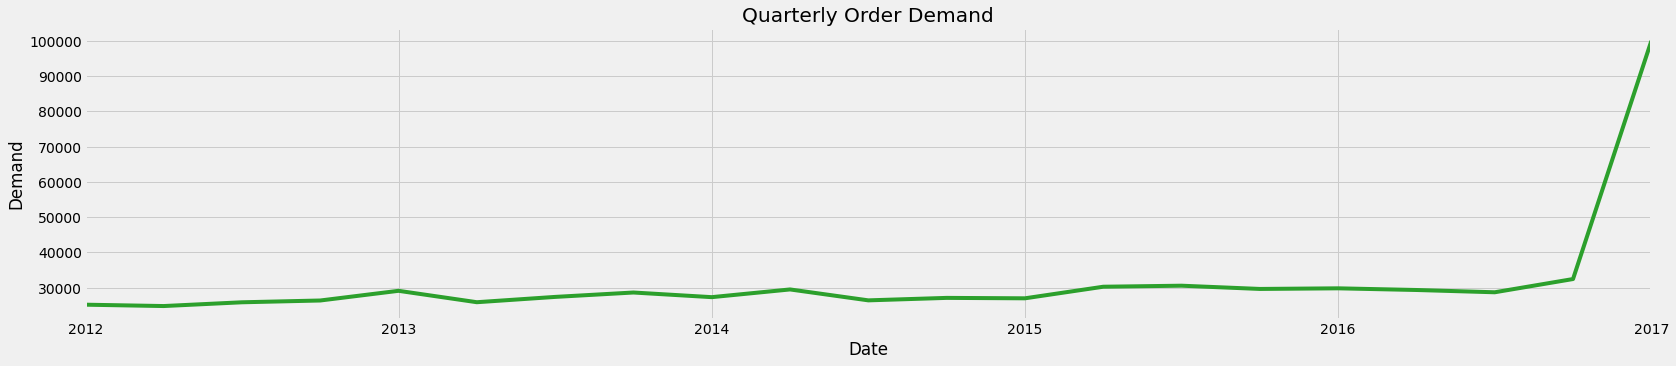

In [ ]:
df_Quarter = df.resample('Q').mean()
df_Quarter.Demand.plot(figsize = (25,5), title = 'Quarterly Order Demand', color = color_pal[2])
plt.ylabel('Demand')
plt.show()

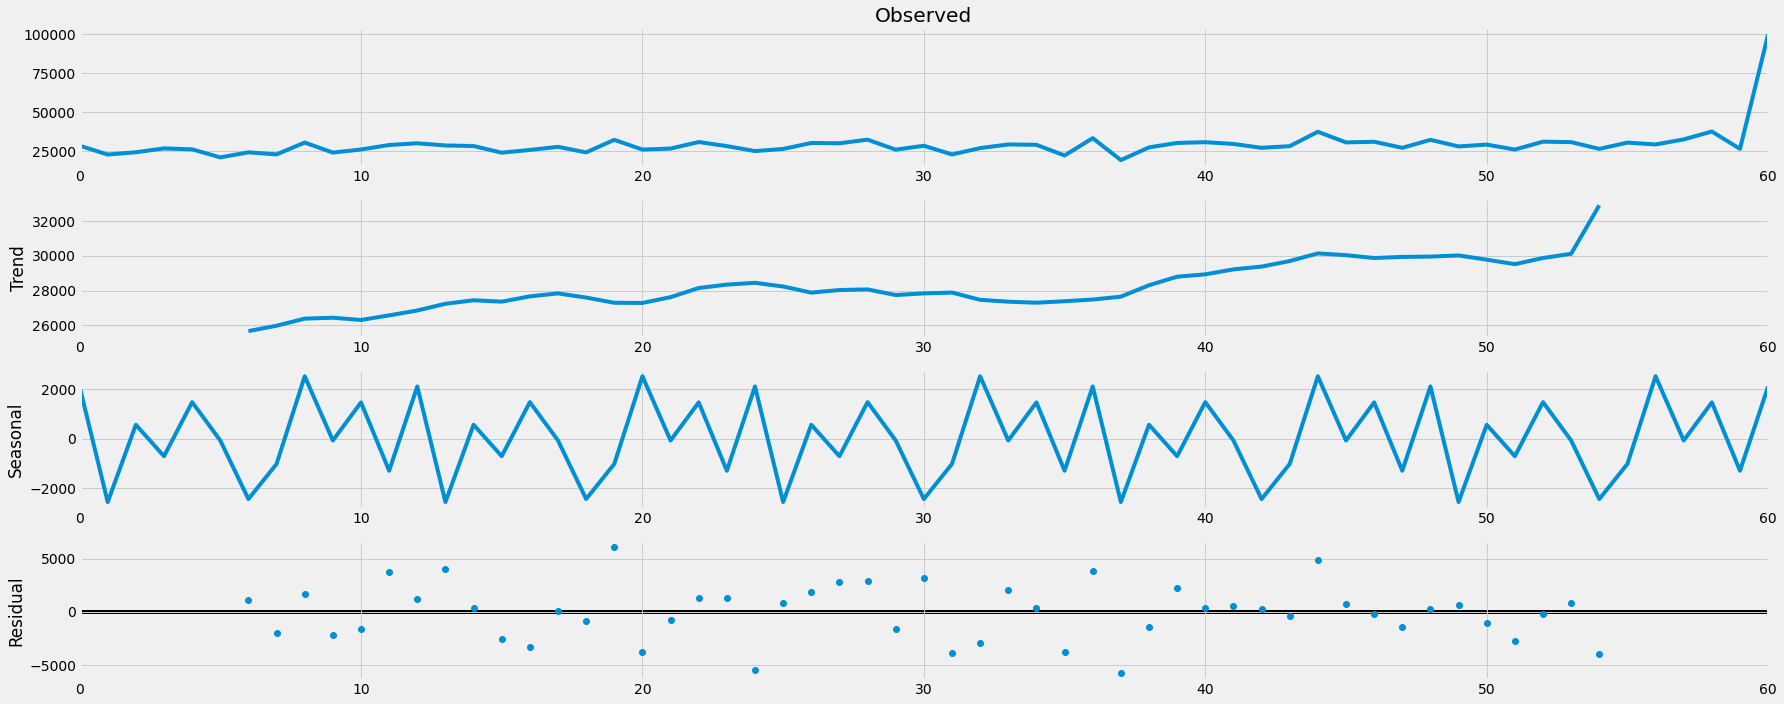

In [ ]:
#Seasonal decomposition using moving averages
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 25, 10
decomposition = seasonal_decompose(df_month.Demand.values, model='additive', period = 12)
                   
fig = decomposition.plot()
plt.show()

In [ ]:
# import stats libraries
from statsmodels.tsa.stattools import adfuller
adfuller(df_month['Demand'])

(0.6554456052134716,
 0.9889054522946432,
 2,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 1044.7724569028626)

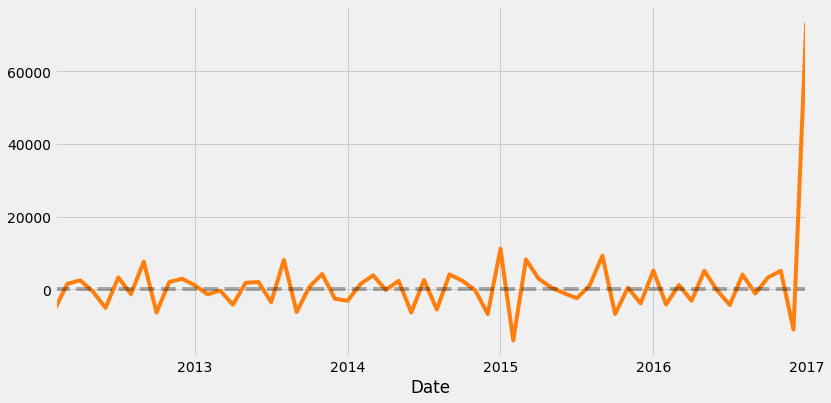

In [ ]:
# Take First Difference to Remove Trend
df_diff = df_month.Demand.diff()[1:]
df_diff.plot(figsize=(12,6), color = color_pal[1])
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [ ]:
# Augmented Dicker Fuller Test to check if this new series is stationnary after differentiation
adfuller(df_diff)

(-8.606358839218705,
 6.655983575004974e-14,
 0,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1022.57638323001)

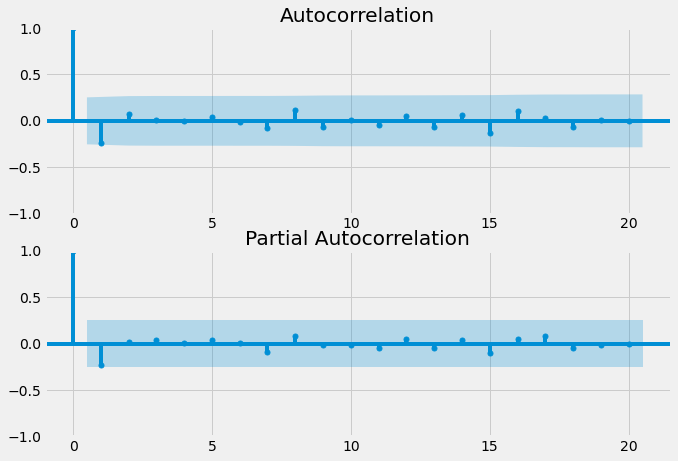

In [ ]:
# Import libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot ACF
fig = plt.figure(figsize = (10,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff, lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff, lags = 20, method='ywm', ax = ax2)
plt.show()

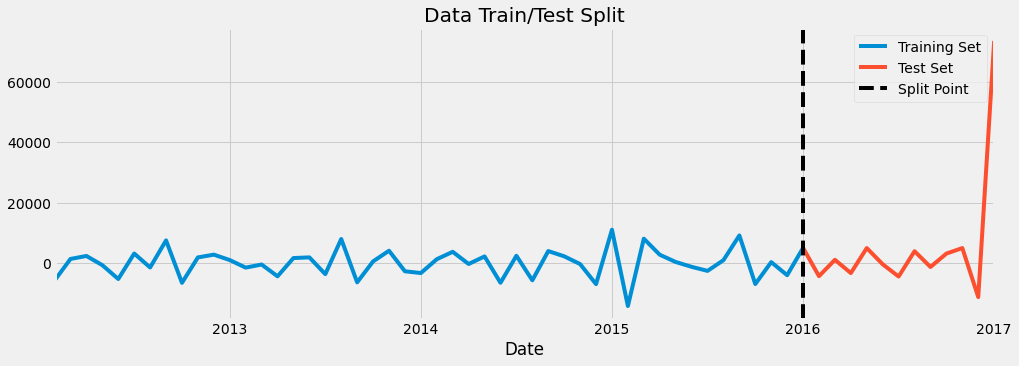

In [ ]:
from datetime import datetime
from datetime import timedelta
train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train = df_diff[:train_end]
df_test = df_diff[train_end:test_end]

# plot train and test dataset on the same graph
fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Split Point'])
plt.show()

#ARIMA

In [ ]:
# Fit the model
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df_train, order = (1,1,1)).fit()

In [ ]:
# summary of the model
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -457.900
Date:                Fri, 24 Mar 2023   AIC                            921.800
Time:                        15:23:53   BIC                            927.351
Sample:                    02-01-2012   HQIC                           923.889
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5740      0.118     -4.860      0.000      -0.805      -0.342
ma.L1         -1.0000      0.228     -4.387      0.000      -1.447      -0.553
sigma2       1.57e+07   1.45e-08   1.08e+15      0.0

In [ ]:
# get the predictions start and end dates
pred_start = df_test.index[0]
pred_end= df_test.index[-1]

# Make predictions
prediction = model_arima.predict(start = pred_start, end = pred_end)

# Get the residuals
residuals = df_test - prediction

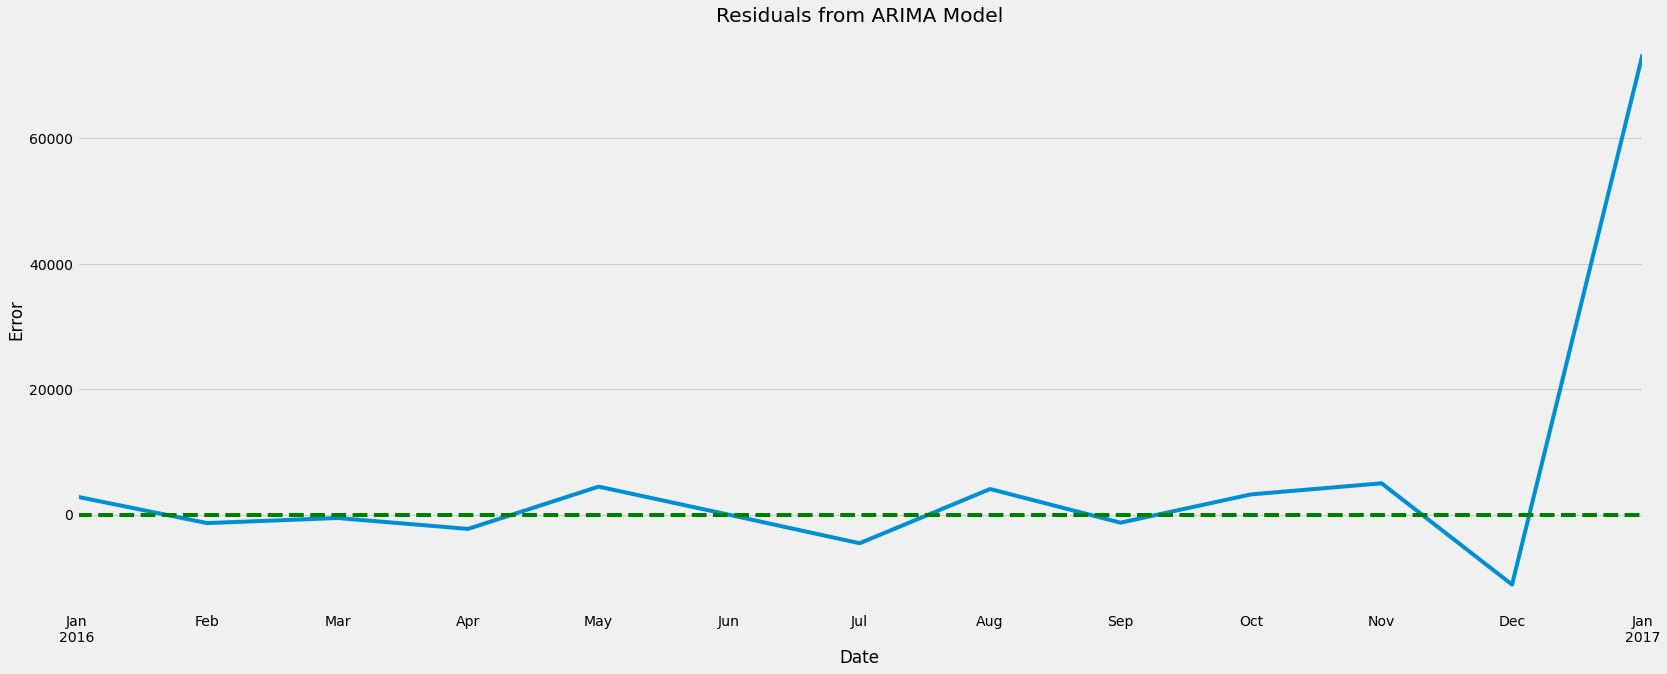

In [ ]:
# Plot the residuals
residuals.plot(kind = 'line', title = 'Residuals from ARIMA Model')
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

In [ ]:
# Get the Root Mean Square Error
rmse = np.sqrt(np.mean(residuals**2))
rmse

20799.17646833539

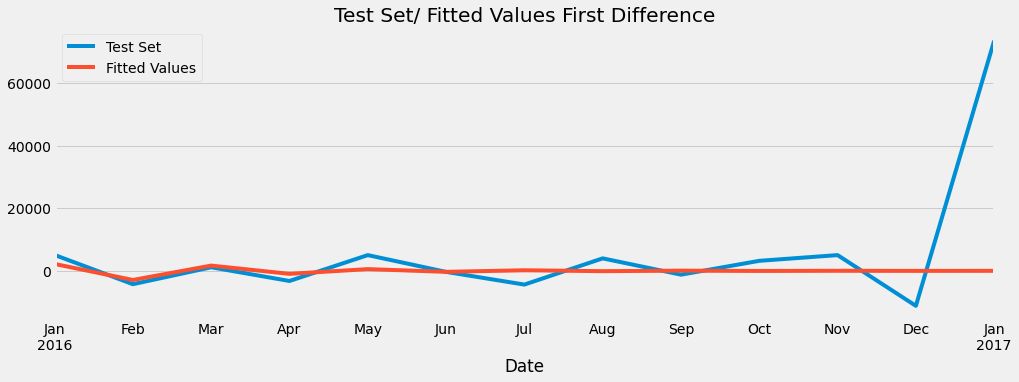

In [ ]:

# Plot the train set against the predicted values
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
prediction.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

#SARIMA

In [ ]:
%pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_month['Demand'],trace = True,suppress_warnings=True)
stepwise_fit.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1276.399, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1285.968, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1273.670, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1279.409, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1284.736, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1272.430, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1274.373, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1274.399, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1273.388, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1276.330, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1272.469, Time=0.09 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -632.215
Date:                Fri, 24 Mar 2023   AIC                           1272.430
Time:                        15:24:02   BIC                           1280.807
Sample:                    01-01-2012   HQIC                          1275.707
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1462.6675   1920.772      0.761      0.446   -2301.977    5227.312
ar.L1         -1.2511      0.291     -4.297      0.000      -1.822      -0.681
ar.L2         -0.4617      0.324     -1.424      0.154      -1.097       0.174
sigma2          8e+07      0.212   3.76e+08      0.000       8e+07       8e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2335.75
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               7.77   Skew:                             4.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.74e+23. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima =SARIMAX(df_train,
                                order=(2, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
print(model_sarima.summary().tables[1])
pred = model_sarima.predict(start = pred_start, end = pred_end)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1054      0.383     -2.887      0.004      -1.856      -0.355
ar.L2         -0.5225      0.413     -1.264      0.206      -1.333       0.287
ar.S.L12      -0.0929      0.769     -0.121      0.904      -1.599       1.413
ma.S.L12      -0.7091      0.999     -0.709      0.478      -2.668       1.250
sigma2      5.403e+07   9.66e-09    5.6e+15      0.000     5.4e+07     5.4e+07


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
pred

2016-01-01   -1880.574432
2016-02-01   -6298.577828
2016-03-01    3564.192806
2016-04-01     108.652725
2016-05-01     -75.584042
2016-06-01   -1497.994906
2016-07-01    -728.730687
2016-08-01      37.181661
2016-09-01    2664.999071
2016-10-01   -1831.191835
2016-11-01     925.136124
2016-12-01   -2711.626618
2017-01-01    3091.093169
Freq: MS, Name: predicted_mean, dtype: float64

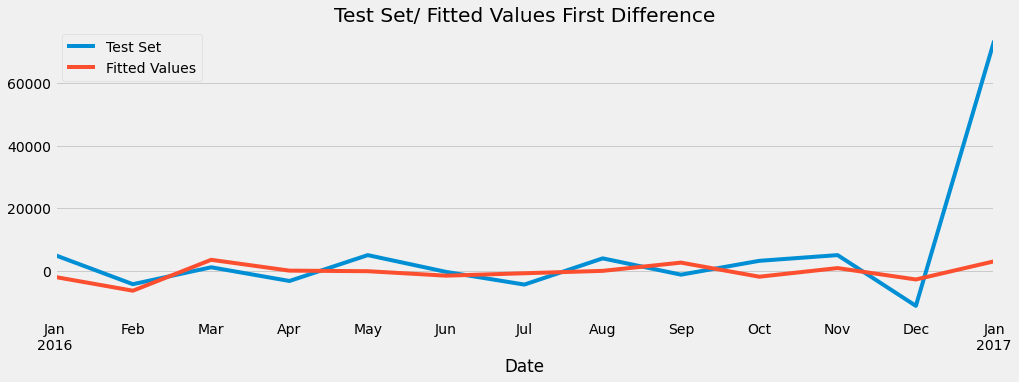

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [ ]:
residuals = df_test - pred
rmse = np.sqrt(np.mean(residuals**2))
rmse


20013.17146191934